Using device: cuda
Epoch 1/20 - Model1 Train Loss: 0.1975, Test Loss: 0.0021, Train Correct: 55741, Test Correct: 9720
Epoch 1/20 - Model2 Train Loss: 0.0180, Test Loss: 0.0105, Train Correct: 54078, Test Correct: 9609
Epoch 1/20 - Model3 Train Loss: 0.0226, Test Loss: 0.0003, Train Correct: 56822, Test Correct: 9806
Epoch 2/20 - Model1 Train Loss: 0.1012, Test Loss: 0.0015, Train Correct: 58383, Test Correct: 9815
Epoch 2/20 - Model2 Train Loss: 1.3367, Test Loss: 0.0015, Train Correct: 58092, Test Correct: 9746
Epoch 2/20 - Model3 Train Loss: 0.0061, Test Loss: 0.0013, Train Correct: 58854, Test Correct: 9800
Epoch 3/20 - Model1 Train Loss: 0.0011, Test Loss: 0.0015, Train Correct: 58722, Test Correct: 9809
Epoch 3/20 - Model2 Train Loss: 0.0035, Test Loss: 0.0064, Train Correct: 58513, Test Correct: 9791
Epoch 3/20 - Model3 Train Loss: 0.0075, Test Loss: 0.0006, Train Correct: 59133, Test Correct: 9890
Epoch 4/20 - Model1 Train Loss: 0.0119, Test Loss: 0.0002, Train Correct: 58945, 

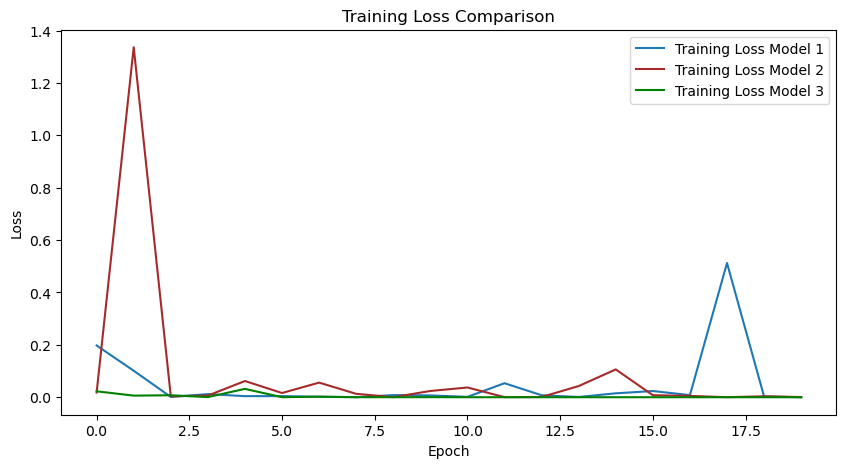

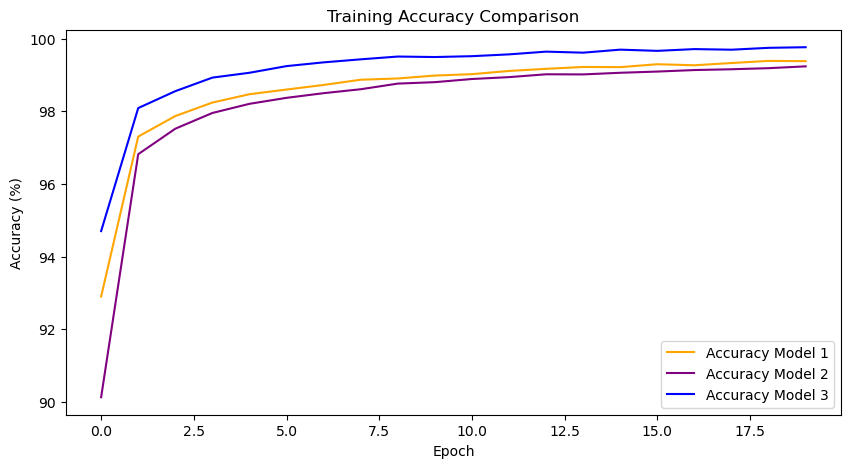

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


torch.manual_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Define the transform
transform = transforms.ToTensor()

# Load the MNIST dataset
train_data_set = datasets.MNIST(root='mnist_data', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='mnist_data', train=False, download=True, transform=transform)

# Define parameters for DataLoader
batch_size = 10
train_loader = DataLoader(dataset=train_data_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data_set, batch_size=batch_size, shuffle=False)

################################## Define the Models #############################

# Model 1
class ConvNet1(nn.Module):
    def __init__(self):
        super(ConvNet1, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, 1)  # First convolutional layer
        self.conv2 = nn.Conv2d(8, 18, 3, 1)  # Second convolutional layer
        self.fc1 = nn.Linear(5*5*18, 18)  # First fully connected layer
        self.fc2 = nn.Linear(18, 10)  # Output layer

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU after conv1
        x = F.max_pool2d(x, 2, 2)  # Max pooling
        x = F.relu(self.conv2(x))  # Apply ReLU after conv2
        x = F.max_pool2d(x, 2, 2)  # Max pooling
        x = x.view(-1, 5*5*18)  # Flatten
        x = F.relu(self.fc1(x))  # Apply ReLU after fc1
        x = self.fc2(x)  # Output layer
        return F.log_softmax(x, dim=1)  

# Model 2
class ConvNet2(nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 4, 1)  # First convolutional layer
        self.conv2 = nn.Conv2d(6, 16, 4, 1)  # Second convolutional layer
        self.fc1 = nn.Linear(4*4*16, 16)  # First fully connected layer
        self.fc2 = nn.Linear(16, 14)  # Second fully connected layer
        self.fc3 = nn.Linear(14, 10)  # Output layer

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU after conv1
        x = F.max_pool2d(x, 2, 2)  # Max pooling
        x = F.relu(self.conv2(x))  # Apply ReLU after conv2
        x = F.max_pool2d(x, 2, 2)  # Max pooling
        x = x.view(-1, 4*4*16)  # Flatten
        x = F.relu(self.fc1(x))  # Apply ReLU after fc1
        x = F.relu(self.fc2(x))  # Apply ReLU after fc2
        x = self.fc3(x)  # Output layer
        return F.log_softmax(x, dim=1)  

# Model 3
class ConvNet3(nn.Module):
    def __init__(self):
        super(ConvNet3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5, 1)  # First convolutional layer
        self.conv2 = nn.Conv2d(10, 20, 5, 1)  # Second convolutional layer
        self.fc1 = nn.Linear(4*4*20, 50)  # First fully connected layer (4*4*20 instead of 3*3*20)
        self.fc2 = nn.Linear(50, 10)  # Output layer

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU after conv1
        x = F.max_pool2d(x, 2, 2)  # Max pooling
        x = F.relu(self.conv2(x))  # Apply ReLU after conv2
        x = F.max_pool2d(x, 2, 2)  # Max pooling
        x = x.view(-1, 4*4*20)  # Flatten (corrected to 4*4*20)
        x = F.relu(self.fc1(x))  # Apply ReLU after fc1
        x = self.fc2(x)  
        return F.log_softmax(x, dim=1)  

#Instantiate Models 
model1 = ConvNet1().to(device)
model2 = ConvNet2().to(device)
model3 = ConvNet3().to(device)

# Define loss and optimizers
crit_loss1 = nn.CrossEntropyLoss()
optim1 = torch.optim.Adam(model1.parameters(), lr=0.001)

crit_loss2 = nn.CrossEntropyLoss()
optim2 = torch.optim.Adam(model2.parameters(), lr=0.001)

crit_loss3 = nn.CrossEntropyLoss()
optim3 = torch.optim.Adam(model3.parameters(), lr=0.001)

# Training Loop 
epochs = 20

# Lists to store losses and accuracies for the models
train_losses1, train_losses2, train_losses3 = [], [], []
test_losses1, test_losses2, test_losses3 = [], [], []
train_correct1, train_correct2, train_correct3 = [], [], []
test_correct1, test_correct2, test_correct3 = [], [], []

for epoch in range(epochs):
    # ConvNet1
    model1.train()
    train_corr1 = 0
    for x_train, y_train in train_loader:
        x_train, y_train = x_train.to(device), y_train.to(device)
        y_pred1 = model1(x_train)
        loss1 = crit_loss1(y_pred1, y_train)
        predicted1 = torch.max(y_pred1.data, 1)[1]
        train_corr1 += (predicted1 == y_train).sum().item()
        optim1.zero_grad()
        loss1.backward()
        optim1.step()
    train_losses1.append(loss1.item())
    train_correct1.append(train_corr1)

    # ConvNet2
    model2.train()
    train_corr2 = 0
    for x_train, y_train in train_loader:
        x_train, y_train = x_train.to(device), y_train.to(device)
        y_pred2 = model2(x_train)
        loss2 = crit_loss2(y_pred2, y_train)
        predicted2 = torch.max(y_pred2.data, 1)[1]
        train_corr2 += (predicted2 == y_train).sum().item()
        optim2.zero_grad()
        loss2.backward()
        optim2.step()
    train_losses2.append(loss2.item())
    train_correct2.append(train_corr2)

    # ConvNet3
    model3.train()
    train_corr3 = 0
    for x_train, y_train in train_loader:
        x_train, y_train = x_train.to(device), y_train.to(device)
        y_pred3 = model3(x_train)
        loss3 = crit_loss3(y_pred3, y_train)
        predicted3 = torch.max(y_pred3.data, 1)[1]
        train_corr3 += (predicted3 == y_train).sum().item()
        optim3.zero_grad()
        loss3.backward()
        optim3.step()
    train_losses3.append(loss3.item())
    train_correct3.append(train_corr3)

    # Evaluate all models on the test set
    model1.eval(), model2.eval(), model3.eval()
    test_corr1, test_corr2, test_corr3 = 0, 0, 0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)
            
            # ConvNet1
            y_val1 = model1(x_test)
            predicted1 = torch.max(y_val1.data, 1)[1]
            test_corr1 += (predicted1 == y_test).sum().item()
            loss1 = crit_loss1(y_val1, y_test)
            
            # ConvNet2
            y_val2 = model2(x_test)
            predicted2 = torch.max(y_val2.data, 1)[1]
            test_corr2 += (predicted2 == y_test).sum().item()
            loss2 = crit_loss2(y_val2, y_test)
            
            # ConvNet3
            y_val3 = model3(x_test)
            predicted3 = torch.max(y_val3.data, 1)[1]
            test_corr3 += (predicted3 == y_test).sum().item()
            loss3 = crit_loss3(y_val3, y_test)

    test_losses1.append(loss1.item())
    test_losses2.append(loss2.item())
    test_losses3.append(loss3.item())
    test_correct1.append(test_corr1)
    test_correct2.append(test_corr2)
    test_correct3.append(test_corr3)

    # Print results for each epoch
    print(f"Epoch {epoch+1}/{epochs} - Model1 Train Loss: {train_losses1[-1]:.4f}, Test Loss: {test_losses1[-1]:.4f}, Train Correct: {train_correct1[-1]}, Test Correct: {test_correct1[-1]}")
    print(f"Epoch {epoch+1}/{epochs} - Model2 Train Loss: {train_losses2[-1]:.4f}, Test Loss: {test_losses2[-1]:.4f}, Train Correct: {train_correct2[-1]}, Test Correct: {test_correct2[-1]}")
    print(f"Epoch {epoch+1}/{epochs} - Model3 Train Loss: {train_losses3[-1]:.4f}, Test Loss: {test_losses3[-1]:.4f}, Train Correct: {train_correct3[-1]}, Test Correct: {test_correct3[-1]}")


# Plot Training Loss Comparison
plt.figure(figsize=(10, 5))
plt.plot(train_losses1, label='Training Loss Model 1')
plt.plot(train_losses2, label='Training Loss Model 2', color='brown')
plt.plot(train_losses3, label='Training Loss Model 3', color='green')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training Accuracy Comparison
total_samples = len(train_data_set)  
plt.figure(figsize=(10, 5))
plt.plot([t / total_samples * 100 for t in train_correct1], label='Accuracy Model 1', color='orange')
plt.plot([t / total_samples * 100 for t in train_correct2], label='Accuracy Model 2', color='purple')
plt.plot([t / total_samples * 100 for t in train_correct3], label='Accuracy Model 3', color='blue')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
